In [1]:
#Obtain the permittivity from Drude-Lorentz with Rakic 1998 params 

#Import the Rakic 98 values for the params
import numpy as np
import matplotlib.pyplot as plt
import camelot
import pandas

h=6.62E-34;  #planck constant, J.s
c_const=3E8; #speed of light, m/S
qe=1.6E-19;  #electron change, C
hev=4.14*10**(-15) #ev.s
wlow=247E-9 #m
whigh=12398.41930E-9#m


In [2]:
#import Rakic constants
tables = camelot.read_pdf('rakic98.pdf', flavor='stream', pages='4')
tables[2].to_csv('rakicLDparams.csv') # get the params into an csv 
#tables[2].df #panda data frame 


In [3]:
#add the data relative to the plasma energies in ev 

wpj=['wp',9.01,9.03,10.83,14.98,18.51,10.75,15.92,9.72,9.59,7.29,13.22]
wpjpd=pandas.DataFrame(wpj)
wpjpd.T

,0,1,2,3,4,5,6,7,8,9,10,11
0,wp,9.01,9.03,10.83,14.98,18.51,10.75,15.92,9.72,9.59,7.29,13.22


In [4]:
data=tables[2].df # define gold values 
data=data.append(wpjpd.T)
data

,0,1,2,3,4,5,6,7,8,9,10,11
0,,,,Table 2.,,Values of the LD Model Parameters,,,,,,
1,,,,,,,Metal,,,,,
2,Parameters,Ag,Au,Cu,Al,Be,Cr,Ni,Pd,Pt,Ti,W
3,f0,0.845,0.760,0.575,0.523,0.084,0.168,0.096,0.330,0.333,0.148,0.206
4,G0,0.048,0.053,0.030,0.047,0.035,0.047,0.048,0.008,0.080,0.082,0.064
5,f1,0.065,0.024,0.061,0.227,0.031,0.151,0.100,0.649,0.191,0.899,0.054
6,a,,,,,,,,,,,
7,G1,3.886,0.241,0.378,0.333,1.664,3.175,4.511,2.950,0.517,2.276,0.530
8,a,,,,,,,,,,,
9,v1,0.816,0.415,0.291,0.162,0.100,0.121,0.174,0.336,0.780,0.777,1.004


In [5]:
#change headers to name of the materials 

data.columns = data.iloc[2] 
#data['Au'] #call by the header
au=pandas.concat([data['Parameters'],data['Au']],axis=1)
au

,Parameters,Au
0,,
1,,
2,Parameters,Au
3,f0,0.760
4,G0,0.053
5,f1,0.024
6,a,
7,G1,0.241
8,a,
9,v1,0.415


In [6]:
data.iloc[2,2] 

u'Au'

In [7]:
data.loc[data.Parameters.str.startswith('f', na=False)]

2,Parameters,Ag,Au,Cu,Al,Be,Cr,Ni,Pd,Pt,Ti,W
3,f0,0.845,0.760,0.575,0.523,0.084,0.168,0.096,0.330,0.333,0.148,0.206
5,f1,0.065,0.024,0.061,0.227,0.031,0.151,0.100,0.649,0.191,0.899,0.054
10,f2,0.124,0.010,0.104,0.050,0.140,0.150,0.135,0.121,0.659,0.393,0.166
13,f3,0.011,0.071,0.723,0.166,0.530,1.149,0.106,0.638,0.547,0.187,0.706
16,f4,0.840,0.601,0.638,0.030,0.130,0.825,0.729,0.453,3.576,0.001,2.590
19,f5,5.646,4.384,—,—,—,—,—,—,—,—,—


In [8]:
data.loc[data.Parameters.str.startswith('G', na=False)]

2,Parameters,Ag,Au,Cu,Al,Be,Cr,Ni,Pd,Pt,Ti,W
4,G0,0.048,0.053,0.030,0.047,0.035,0.047,0.048,0.008,0.080,0.082,0.064
7,G1,3.886,0.241,0.378,0.333,1.664,3.175,4.511,2.950,0.517,2.276,0.530
11,G2,0.452,0.345,1.056,0.312,3.395,1.305,1.334,0.555,1.838,2.518,1.281
14,G3,0.065,0.870,3.213,1.351,4.454,2.676,2.178,4.621,3.668,1.663,3.332
17,G4,0.916,2.494,4.305,3.382,1.802,1.335,6.292,3.236,8.517,1.762,5.836
20,G5,2.419,2.214,—,—,—,—,—,—,—,—,—


In [9]:
data.loc[data.Parameters.str.startswith('v', na=False)]

2,Parameters,Ag,Au,Cu,Al,Be,Cr,Ni,Pd,Pt,Ti,W
9,v1,0.816,0.415,0.291,0.162,0.100,0.121,0.174,0.336,0.780,0.777,1.004
12,v2,4.481,0.830,2.957,1.544,1.032,0.543,0.582,0.501,1.314,1.545,1.917
15,v3,8.185,2.969,5.300,1.808,3.183,1.970,1.597,1.659,3.141,2.509,3.580
18,v4,9.083,4.304,11.18,3.473,4.604,8.775,6.089,5.715,9.249,19.43,7.498
21,v5,20.29,13.32,—,—,—,—,—,—,—,—,—


In [10]:
data.loc[data.Parameters.str.startswith('w', na=False)]

2,Parameters,Ag,Au,Cu,Al,Be,Cr,Ni,Pd,Pt,Ti,W
0,wp,9.01,9.03,10.83,14.98,18.51,10.75,15.92,9.72,9.59,7.29,13.22


In [11]:
farr= np.array(data.loc[data.Parameters.str.startswith('f', na=False)].Au.to_numpy(dtype=float))
Garr= np.array(data.loc[data.Parameters.str.startswith('G', na=False)].Au.to_numpy(dtype=float))
varr= np.array(data.loc[data.Parameters.str.startswith('v', na=False)].Au.to_numpy(dtype=float))
varr=np.insert(np.array(varr),0,1.0)
Garrhz=(np.float64(Garr)*qe)/h
varrhz=(np.float64(varr)*qe)/h

In [12]:
#define Drude Lorentz functional 
def epsrf(fj,omgp,omg,gam0): 
    return (1-fj*omgp**2/(omg*(omg-1j*gam0)))

def epsrb(fj,omgp,omg,vj,gamj): 
    return fj*omgp**2/((vj**2-omg**2)+1j*omg*gamj)

def espr(fj,omgp,omg,vj,gamj,lim):
    return epsrf(fj[0],omgp,omg,gamj[0])\
+sum(epsrb(fj[i],omgp,omg,vj[i],gamj[i]) for i in np.arange(1,lim))

In [13]:
wlarray=np.arange(wlow,whigh,10E-9) #wavelength in m 
omgarray=c_const/(wlarray)
omgarray=omgarray[::-1] # frequency in Hz
en=h*(c_const/wlarray)/qe #energy in eV 
wpj[2]

9.03

In [14]:
#epsilon calculation as function of wavelength 
nr=np.count_nonzero(~np.isnan(farr))
#testing for Au
earray=[espr(farr,wpj[2]/hev,omg,varrhz,Garrhz,nr) for omg in omgarray]

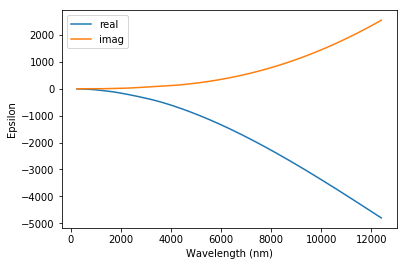

In [15]:
plt.plot(wlarray*1E9,np.real(earray[::-1]))
plt.plot(wlarray*1E9,-np.imag(earray[::-1]))
plt.xlabel("Wavelength (nm)")
plt.ylabel("Epsilon")
plt.legend(["real","imag"])

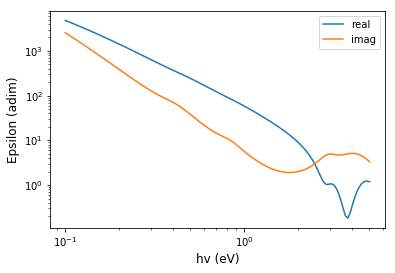

In [16]:
plt.loglog(en,abs(np.real(earray[::-1])))
plt.loglog(en,abs(np.imag(earray[::-1])))
plt.xlabel("hv (eV)",fontsize=12)
plt.ylabel("Epsilon (adim)",fontsize=12)
plt.legend(["real","imag"])

In [17]:
#nr of columns = nr of materials
nm=np.shape(data.loc[data.Parameters.str.startswith('G', na=False)])[1]

#cycle in the materials
for n in np.arange(1,nm): 
    farr = data.loc[data.Parameters.str.startswith('f', na=False)].iloc[:,[n]]
    farr = farr.apply(pandas.to_numeric, errors='coerce')
    farr = np.array(farr)
    
    Garr = data.loc[data.Parameters.str.startswith('G', na=False)].iloc[:,[n]]
    Garr = Garr.apply(pandas.to_numeric, errors='coerce')
    Garr = np.array(Garr)
    
    varr = data.loc[data.Parameters.str.startswith('v', na=False)].iloc[:,[n]]
    varr = varr.apply(pandas.to_numeric, errors='coerce')
    varr = np.array(varr)
    varr = np.insert(np.array(varr),0,1.0)
    
    Garrhz=(Garr*qe)/h
    varrhz=(varr*qe)/h
    print(Garrhz[1])
    
    #avoid probs with the nan 
    nr=np.count_nonzero(~np.isnan(farr))
    earray=[espr(farr,wpj[n]/hev,omg,varrhz,Garrhz, nr) for omg in omgarray]
    
    plt.plot(wlarray*1E9,np.real(earray[::-1]))
    plt.plot(wlarray*1E9,-np.imag(earray[::-1]))
    plt.xlabel("Wavelength (nm)")
    plt.ylabel("Epsilon")
    plt.legend(["real","imag"])
    plt.savefig(str(data.iloc[2,n])+'wl.png')
    plt.close()
    
    plt.loglog(en,abs(np.real(earray[::-1])))
    plt.loglog(en,abs(np.imag(earray[::-1])))
    plt.xlabel("hv (eV)",fontsize=12)
    plt.ylabel("Epsilon (adim)",fontsize=12)
    plt.legend(["real","imag"])
    plt.savefig(str(data.iloc[2,n])+'en.png')
    plt.close()

[9.39214502e+14]
[5.82477341e+13]
[9.13595166e+13]
[8.04833837e+13]
[4.02175227e+14]
[7.67371601e+14]
[1.0902719e+15]
[7.12990937e+14]
[1.24954683e+14]
[5.50090634e+14]
[1.28096677e+14]
